# Imports

In [1]:
import pandas as pd

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

training = True
seed=42

# Loading Data

In [2]:
anac_df = pd.read_csv("data.csv")
feriados = pd.read_csv("feriados.csv")

/home/welberth/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
anac_df.shape

(3549883, 52)

In [79]:
anac_df.head()

,id_basica,sg_empresa_icao,nm_empresa,nm_pais,ds_tipo_empresa,ds_di,ds_grupo_di,ds_tipo_linha,ds_servico_tipo_linha,nr_etapa,nr_ano_partida_real,nm_semestre_partida_real,nm_trimestre_partida_real,hr_partida_real,dt_partida_real,nm_mes_partida_real,nr_mes_partida_real,nm_dia_semana_partida_real,nr_dia_partida_real,sg_iata_origem,nm_pais_origem,nm_regiao_origem,sg_uf_origem,nm_municipio_origem,nr_escala_destino,hr_chegada_real,dt_chegada_real,nm_mes_chegada_real,nr_mes_chegada_real,nm_dia_semana_chegada_real,nr_dia_chegada_real,sg_iata_destino,nm_pais_destino,nm_regiao_destino,sg_uf_destino,nm_municipio_destino,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,sg_equipamento_icao,lt_combustivel,km_distancia,nr_horas_voadas,kg_payload,kg_bagagem_livre,kg_bagagem_excesso,kg_carga_paga,kg_peso,nr_velocidade_media,nr_carga_paga_km,nr_ask,nr_rpk
0,12017235,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,REGULAR PREVISTO EM HOTRAN,REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,2,2016.0,1º SEMESTRE,1º TRIMESTRE,06:52:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,THE,BRASIL,NORDESTE,PI,TERESINA,NaN,08:23:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,REC,BRASIL,NORDESTE,PE,RECIFE,118,83,0,E195,3442,937.0,"1,52",16842,1100,6,77,7408,"616,393",72149,110566.0,77771.0
1,12017070,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,01:43:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,SSA,BRASIL,NORDESTE,BA,SALVADOR,NaN,02:37:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,IOS,BRASIL,NORDESTE,BA,ILHÉUS,70,0,0,AT72,684,225.0,"0,9",7435,0,0,0,0,"250,491",0,15750.0,0.0
2,12017071,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,02:58:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,IOS,BRASIL,NORDESTE,BA,ILHÉUS,NaN,04:51:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCZ,BRASIL,NORDESTE,AL,RIO LARGO,70,33,0,AT72,1392,687.0,"1,88",7390,592,0,0,3067,"365,32",0,48090.0,22671.0
3,12017072,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,05:15:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCZ,BRASIL,NORDESTE,AL,RIO LARGO,NaN,06:32:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,SSA,BRASIL,NORDESTE,BA,SALVADOR,70,0,0,AT72,911,468.0,"1,28",7535,0,0,0,150,"365,496",0,32760.0,0.0
4,12017082,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,EXTRA SEM HOTRAN,NÃO REGULAR,INTERNACIONAL MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,13:25:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,VCP,BRASIL,SUDESTE,SP,CAMPINAS,NaN,22:24:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCO,ESTADOS UNIDOS DA AMÉRICA,NaN,NaN,"ORLANDO, FLORIDA",266,260,6,A332,59747,6792.0,"8,98",49489,4665,0,619,25234,"756,301",4204250,1806670.0,1765920.0


In [96]:
feriados.shape

(57, 3)

In [97]:
feriados.head()

,data,fl_feriado,desc_feriado
0,2016-01-01,1,confraternização universal (feriado nacional)
1,2016-02-09,1,(terça-feira ) – Carnaval (ponto facultativo)
2,2016-02-10,1,(quarta-feira ) – Quarta-feira Cinzas (ponto...
3,2016-03-25,1,(sexta-feira ) – Paixão Cristo (feriado naci...
4,2016-04-21,1,(quinta-feira) – Tirantes (feriado nacional)


In [3]:
feriados['data_1'] = feriados.data.apply(lambda x: str((datetime.strptime(x, '%Y-%m-%d')- timedelta(days=1)).date()))

In [99]:
feriados.head()

,data,fl_feriado,desc_feriado,data_1
0,2016-01-01,1,confraternização universal (feriado nacional),2015-12-31
1,2016-02-09,1,(terça-feira ) – Carnaval (ponto facultativo),2016-02-08
2,2016-02-10,1,(quarta-feira ) – Quarta-feira Cinzas (ponto...,2016-02-09
3,2016-03-25,1,(sexta-feira ) – Paixão Cristo (feriado naci...,2016-03-24
4,2016-04-21,1,(quinta-feira) – Tirantes (feriado nacional),2016-04-20


In [4]:
anac_df = anac_df.merge(feriados[['data_1','fl_feriado']], left_on='dt_partida_real', right_on='data_1', how = 'left')

In [103]:
anac_df2.shape

(3549883, 54)

In [5]:
anac_df.fillna(int(0), inplace=True)

In [121]:
anac_df.query("fl_feriado == 0")

,id_basica,sg_empresa_icao,nm_empresa,nm_pais,ds_tipo_empresa,ds_di,ds_grupo_di,ds_tipo_linha,ds_servico_tipo_linha,nr_etapa,nr_ano_partida_real,nm_semestre_partida_real,nm_trimestre_partida_real,hr_partida_real,dt_partida_real,nm_mes_partida_real,nr_mes_partida_real,nm_dia_semana_partida_real,nr_dia_partida_real,sg_iata_origem,nm_pais_origem,nm_regiao_origem,sg_uf_origem,nm_municipio_origem,nr_escala_destino,hr_chegada_real,dt_chegada_real,nm_mes_chegada_real,nr_mes_chegada_real,nm_dia_semana_chegada_real,nr_dia_chegada_real,sg_iata_destino,nm_pais_destino,nm_regiao_destino,sg_uf_destino,nm_municipio_destino,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,sg_equipamento_icao,lt_combustivel,km_distancia,nr_horas_voadas,kg_payload,kg_bagagem_livre,kg_bagagem_excesso,kg_carga_paga,kg_peso,nr_velocidade_media,nr_carga_paga_km,nr_ask,nr_rpk,data_1_x,fl_feriado_x,data_1_y,fl_feriado_y,data_1,fl_feriado
0,12017235,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,REGULAR PREVISTO EM HOTRAN,REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,2,2016.0,1º SEMESTRE,1º TRIMESTRE,06:52:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,THE,BRASIL,NORDESTE,PI,TERESINA,0.0,08:23:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,REC,BRASIL,NORDESTE,PE,RECIFE,118,83,0,E195,3442,937.0,"1,52",16842,1100,6,77,7408,"616,393",72149,110566.0,77771.0,0,0.0,0,0.0,0,0.0
1,12017070,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,01:43:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,SSA,BRASIL,NORDESTE,BA,SALVADOR,0.0,02:37:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,IOS,BRASIL,NORDESTE,BA,ILHÉUS,70,0,0,AT72,684,225.0,"0,9",7435,0,0,0,0,"250,491",0,15750.0,0.0,0,0.0,0,0.0,0,0.0
2,12017071,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,02:58:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,IOS,BRASIL,NORDESTE,BA,ILHÉUS,0.0,04:51:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCZ,BRASIL,NORDESTE,AL,RIO LARGO,70,33,0,AT72,1392,687.0,"1,88",7390,592,0,0,3067,"365,32",0,48090.0,22671.0,0,0.0,0,0.0,0,0.0
3,12017072,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,05:15:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCZ,BRASIL,NORDESTE,AL,RIO LARGO,0.0,06:32:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,SSA,BRASIL,NORDESTE,BA,SALVADOR,70,0,0,AT72,911,468.0,"1,28",7535,0,0,0,150,"365,496",0,32760.0,0.0,0,0.0,0,0.0,0,0.0
4,12017082,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,EXTRA SEM HOTRAN,NÃO REGULAR,INTERNACIONAL MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,13:25:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,VCP,BRASIL,SUDESTE,SP,CAMPINAS,0.0,22:24:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCO,ESTADOS UNIDOS DA AMÉRICA,0,0,"ORLANDO, FLORIDA",266,260,6,A332,59747,6792.0,"8,98",49489,4665,0,619,25234,"756,301",4204250,1806670.0,1765920.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549878,20360805,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,REGULAR PREVISTO EM HOTRAN,REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2020.0,1º SEMESTRE,1º TRIMESTRE,17:12:00,2020-02-02,FEVEREIRO,2.0,DOMINGO,2.0,MAO,BRASIL,NORTE,AM,MANAUS,0.0,19:03:00,2020-02-02,FEVEREIRO,2.0,DOMINGO,2.0,TBT,BRASIL,NORTE,AM,TABATINGA,115,107,1,E195,4591,1105.0,"1,85",10189,1492,81,150,9823,"597,5",165750,127075.0,118235.0,0,0.0,0,0.0,0,0.0
3549879,20360806,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,BRASIL,TRANSPORTE AÉREO REGULAR,REGULAR PREVISTO EM HOTRAN,REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2020.0,1º SEMESTRE,1º TRIMESTRE,09:04:00,2020-02-08,FEVEREIRO,2.0,SÁBADO,8.

# Filtering

In [6]:
df_sp = anac_df.query("sg_iata_origem == 'CGH' & sg_iata_destino == 'SDU'")
keep_list = ["id_basica",
             "sg_empresa_icao",
             "nr_etapa",
             "hr_partida_real",
             "nr_dia_partida_real",
             "nm_dia_semana_partida_real",
             "nm_mes_partida_real",
             "nr_mes_partida_real",
             "dt_partida_real",
             "fl_feriado",
             "hr_chegada_real",
             "nr_dia_chegada_real",
             "nm_dia_semana_chegada_real",
             "dt_chegada_real",
             "nr_ano_partida_real",
             "nr_assentos_ofertados",
             "nr_passag_pagos"]

data = df_sp[keep_list]

In [123]:
data.head()

,id_basica,sg_empresa_icao,nr_etapa,hr_partida_real,nr_dia_partida_real,nm_dia_semana_partida_real,nm_mes_partida_real,nr_mes_partida_real,dt_partida_real,fl_feriado,hr_chegada_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,dt_chegada_real,nr_ano_partida_real,nr_assentos_ofertados,nr_passag_pagos
901,12018065,AZU,1,14:40:00,2.0,SÁBADO,JANEIRO,1.0,2016-01-02,0.0,15:58:00,2.0,SÁBADO,2016-01-02,2016.0,118,64
4631,12021813,AZU,1,16:55:00,7.0,QUINTA-FEIRA,JANEIRO,1.0,2016-01-07,0.0,17:52:00,7.0,QUINTA-FEIRA,2016-01-07,2016.0,106,81
6556,12023749,AZU,1,14:40:00,9.0,SÁBADO,JANEIRO,1.0,2016-01-09,0.0,16:13:00,9.0,SÁBADO,2016-01-09,2016.0,118,78
11947,12029256,AZU,1,14:50:00,16.0,SÁBADO,JANEIRO,1.0,2016-01-16,0.0,15:41:00,16.0,SÁBADO,2016-01-16,2016.0,118,99
17303,12034688,AZU,1,14:47:00,23.0,SÁBADO,JANEIRO,1.0,2016-01-23,0.0,15:41:00,23.0,SÁBADO,2016-01-23,2016.0,118,104


In [18]:
data.dtypes

id_basica                      object
sg_empresa_icao                object
nr_etapa                        int64
hr_partida_real                object
nr_dia_partida_real           float64
nm_dia_semana_partida_real     object
nm_mes_partida_real            object
dt_partida_real                object
hr_chegada_real                object
nr_dia_chegada_real           float64
nm_dia_semana_chegada_real     object
dt_chegada_real                object
nr_ano_partida_real           float64
nr_assentos_ofertados           int64
nr_passag_pagos                 int64
dtype: object

In [7]:
data['hr_partida_round'] = data.hr_partida_real.apply( lambda x : int(x[:2]))
data['hr_chegada_round'] = data.hr_chegada_real.apply( lambda x : int(x[:2]))

/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
cat_encoding = {"nm_dia_semana_partida_real": {"DOMINGO": 1,"SEGUNDA-FEIRA": 2,"TERÇA-FEIRA": 3,"QUARTA-FEIRA": 4,"QUINTA-FEIRA": 5, "SEXTA-FEIRA": 6, "SÁBADO": 7},
                "nm_dia_semana_chegada_real": {"DOMINGO": 1,"SEGUNDA-FEIRA": 2,"TERÇA-FEIRA": 3,"QUARTA-FEIRA": 4,"QUINTA-FEIRA": 5, "SEXTA-FEIRA": 6, "SÁBADO": 7}}

In [9]:
data_enc = data.replace(cat_encoding)

In [10]:
data_enc.drop(['id_basica','sg_empresa_icao','nr_etapa','hr_partida_real','nr_ano_partida_real','dt_chegada_real','hr_chegada_real','nm_mes_partida_real'],axis=1, inplace=True)

In [128]:
data_enc.query('fl_feriado == 0')

,nr_dia_partida_real,nm_dia_semana_partida_real,nr_mes_partida_real,dt_partida_real,fl_feriado,nr_dia_chegada_real,nm_dia_semana_chegada_real,nr_assentos_ofertados,nr_passag_pagos,hr_partida_round,hr_chegada_round
901,2.0,7,1.0,2016-01-02,0.0,2.0,7,118,64,14,15
4631,7.0,5,1.0,2016-01-07,0.0,7.0,5,106,81,16,17
6556,9.0,7,1.0,2016-01-09,0.0,9.0,7,118,78,14,16
11947,16.0,7,1.0,2016-01-16,0.0,16.0,7,118,99,14,15
17303,23.0,7,1.0,2016-01-23,0.0,23.0,7,118,104,14,15
...,...,...,...,...,...,...,...,...,...,...,...
3549665,18.0,3,2.0,2020-02-18,0.0,18.0,3,174,169,8,9
3549669,7.0,6,2.0,2020-02-07,0.0,7.0,6,144,137,8,9
3549706,11.0,3,2.0,2020-02-11,0.0,11.0,3,174,111,11,12
3549752,20.0,5,2.0,2020-02-20,0.0,20.0,5,174,169,13,14


In [11]:
data_grouped = data_enc.groupby(['nr_dia_partida_real','nm_dia_semana_partida_real','nr_mes_partida_real','dt_partida_real','nr_dia_chegada_real','nm_dia_semana_chegada_real','hr_partida_round','hr_chegada_round','fl_feriado']).agg(nr_passag_pagos=('nr_passag_pagos', np.sum),
nr_assentos_ofertados=('nr_assentos_ofertados', np.sum)).reset_index()

In [82]:
data_grouped.shape

(1157, 11)

In [79]:
data_grouped.head(1000)

,nr_dia_partida_real,nm_dia_semana_partida_real,nr_mes_partida_real,dt_partida_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,hr_partida_round,hr_chegada_round,nr_passag_pagos,nr_assentos_ofertados,fl_feriado
0,1.0,3,11.0,2016-11-01,1.0,3,5,6,36,144,1
1,1.0,3,11.0,2016-11-01,1.0,3,6,7,129,441,1
2,1.0,3,11.0,2016-11-01,1.0,3,7,8,298,747,1
3,1.0,3,11.0,2016-11-01,1.0,3,8,9,359,774,1
4,1.0,3,11.0,2016-11-01,1.0,3,9,10,232,603,1
...,...,...,...,...,...,...,...,...,...,...,...
995,29.0,5,3.0,2018-03-29,29.0,5,19,20,719,762,1
996,29.0,5,3.0,2018-03-29,29.0,5,20,21,580,618,1
997,29.0,5,3.0,2018-03-29,29.0,5,21,22,352,402,1
998,29.0,5,3.0,2018-03-29,29.0,5,22,22,59,144,1


# EDA

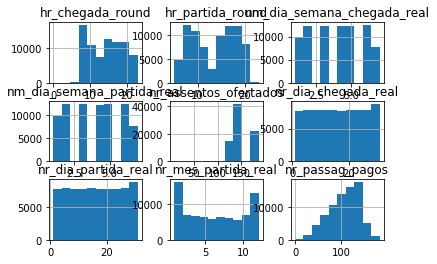

In [120]:
data_enc.hist();

# Modeling

In [166]:
X = data_grouped.drop(['nr_passag_pagos','dt_partida_real','nr_assentos_ofertados'],axis=1)
y = data_grouped.nr_passag_pagos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [154]:
X_train.head()

,nr_dia_partida_real,nm_dia_semana_partida_real,nr_mes_partida_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,hr_partida_round,hr_chegada_round
22141,22.0,3,11.0,22.0,3,15,16
12534,13.0,1,10.0,13.0,1,9,10
14244,14.0,5,11.0,14.0,5,14,15
6232,7.0,1,1.0,7.0,1,19,20
24738,24.0,7,2.0,24.0,7,7,8


In [159]:
if training:

    rf = RandomForestRegressor(random_state=seed, n_jobs=-1)

    param_grid = {'n_estimators' : [300,400],
                  'max_depth' : [6,10,20],
                  'max_features':['auto']}

    grid = GridSearchCV(rf, param_grid=param_grid, cv=5,return_train_score = True).fit(X_train, y_train)

    reg_rf = grid.best_estimator_.fit(X_train,y_train)

    print(grid.best_params_)
    print(grid.cv_results_)

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 400}
{'mean_fit_time': array([1.79138203, 2.30379972, 2.71977959, 3.4319118 , 4.70932331,
       6.30449624]), 'std_fit_time': array([0.03220793, 0.02222715, 0.11153862, 0.02778608, 0.04326292,
       0.03132906]), 'mean_score_time': array([0.10450511, 0.1036005 , 0.10359888, 0.10370965, 0.20447817,
       0.20404344]), 'std_score_time': array([0.00065653, 0.00050968, 0.0007596 , 0.00058836, 0.00047336,
       0.00069075]), 'param_max_depth': masked_array(data=[6, 6, 10, 10, 20, 20],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[300, 400, 300, 400, 300, 400],
             mask=[False, False, False, False, False, False],
     

In [167]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [169]:
print("train MAE: {}".format(mean_absolute_error(y_train,reg_rf.predict(X_train))))
print("test MAE: {}".format(mean_absolute_error(y_test,reg_rf.predict(X_test))))

train MAE: 48.91573335014196
test MAE: 89.36791136388347


In [172]:
X_test['pred'] = reg_rf.predict(X_test)
X_test['real'] = y_test

/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [173]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
nr_dia_partida_real,10401.0,15.672339,8.765378,1.000000,8.000000,16.000000,23.000000,31.000000
nm_dia_semana_partida_real,10401.0,3.958369,1.966718,1.000000,2.000000,4.000000,6.000000,7.000000
nr_mes_partida_real,10401.0,6.315162,3.517496,1.000000,3.000000,6.000000,9.000000,12.000000
nr_dia_chegada_real,10401.0,15.672339,8.765378,1.000000,8.000000,16.000000,23.000000,31.000000
nm_dia_semana_chegada_real,10401.0,3.958369,1.966718,1.000000,2.000000,4.000000,6.000000,7.000000
hr_partida_round,10401.0,13.609364,4.623621,5.000000,9.000000,14.000000,18.000000,22.000000
hr_chegada_round,10401.0,14.495722,4.607958,6.000000,10.000000,15.000000,18.000000,23.000000
pred,10401.0,269.968588,129.952862,20.249969,155.368172,258.153295,361.834997,734.360169
real,10401.0,268.491972,173.229967,0.000000,127.000000,232.000000,386.000000,1141.000000


# Modeling feriados

In [19]:
X = data_grouped.drop(['nr_passag_pagos','dt_partida_real','nr_assentos_ofertados'],axis=1)
y = data_grouped.nr_passag_pagos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [30]:
if training:

    rf = RandomForestRegressor(random_state=seed, n_jobs=-1)

    param_grid = {'n_estimators' : [400],
                  'max_depth' : [6,10,20],
                  'max_features':['auto']}

    grid = GridSearchCV(rf, param_grid=param_grid, cv=5,return_train_score = True).fit(X_train, y_train)

    reg_rf = grid.best_estimator_.fit(X_train,y_train)

    print(grid.best_params_)
    print(grid.cv_results_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 400}
{'mean_fit_time': array([0.44509425, 0.50801053, 0.54948659]), 'std_fit_time': array([0.0438537 , 0.01457714, 0.02043317]), 'mean_score_time': array([0.1043324 , 0.10445132, 0.10414815]), 'std_score_time': array([0.0007515 , 0.00069854, 0.00044232]), 'param_max_depth': masked_array(data=[6, 10, 20],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto', 'auto', 'auto'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[400, 400, 400],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}, {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 400}, {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 400}], 'split0_test_score': array([0.3147406

In [25]:
print("train MAE: {}".format(mean_absolute_error(y_train,reg_rf.predict(X_train))))
print("test MAE: {}".format(mean_absolute_error(y_test,reg_rf.predict(X_test))))

train MAE: 58.35562941467127
test MAE: 106.93462796357802


In [31]:
print("train MAE: {}".format(mean_absolute_error(y_train,reg_rf.predict(X_train))))
print("test MAE: {}".format(mean_absolute_error(y_test,reg_rf.predict(X_test))))

train MAE: 58.066137238493695
test MAE: 106.60483498389904


# Feriados d-1

In [12]:
X = data_grouped.drop(['nr_passag_pagos','dt_partida_real','nr_assentos_ofertados'],axis=1)
y = data_grouped.nr_passag_pagos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [13]:
if training:

    rf = RandomForestRegressor(random_state=seed, n_jobs=-1)

    param_grid = {'n_estimators' : [500,600],
                  'max_depth' : [20,30],
                  'max_features':['auto']}

    grid = GridSearchCV(rf, param_grid=param_grid, cv=5,return_train_score = True).fit(X_train, y_train)

    reg_rf = grid.best_estimator_.fit(X_train,y_train)

    print(grid.best_params_)
    print(grid.cv_results_)

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 600}
{'mean_fit_time': array([ 8.42685008,  9.8788115 ,  9.40908051, 11.22145987]), 'std_fit_time': array([0.61023936, 0.1064249 , 0.04604737, 0.09600827]), 'mean_score_time': array([0.20400319, 0.304563  , 0.30462289, 0.30411201]), 'std_score_time': array([0.00161617, 0.00048201, 0.00049977, 0.00067279]), 'param_max_depth': masked_array(data=[20, 20, 30, 30],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[500, 600, 500, 600],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 500}, {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 600}, {'max_dept

In [14]:
print("train MAE: {}".format(mean_absolute_error(y_train,reg_rf.predict(X_train))))
print("test MAE: {}".format(mean_absolute_error(y_test,reg_rf.predict(X_test))))

train MAE: 49.58872293104551
test MAE: 88.75504066830496
